# Brinkman Flows
## Equations to solve
Stokes euqation is
$$
\alpha^{2}\mathbf{u}=-\phi\nabla p+\nabla^{2}\mathbf{u}
$$

and continuity,
$$
\nabla\cdot\mathbf{u}=0
$$

For 2D, $\mathbf{u}=(u , v)^{T}$,
above equations are: 
$$
\alpha^{2}u+\phi\frac{\partial p}{\partial x}=\frac{\partial^{2}u}{\partial x^{2}}+\frac{\partial^{2}u}{\partial y^{2}}
$$
$$
\alpha^{2}v+\phi\frac{\partial p}{\partial y}=\frac{\partial^{2}v}{\partial x^{2}}+\frac{\partial^{2}v}{\partial y^{2}}
$$ 

and
$$
\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}=0
$$ 


## Discretization with the Finite Volume Method
<img src="https://www.googledrive.com/host/0BynBZDpf_6IbM3BGWkRRUkdnVW8/img/FVMGrid2D.svg" width=400>

#### x-component

Integrate over the u-control volume,
$$
\int_{s}^{n}\int_{w}^{e}\left(-\alpha^{2}u-\phi\frac{\partial p}{\partial x}+\frac{\partial^{2}u}{\partial x^{2}}+\frac{\partial^{2}u}{\partial y^{2}}\right)dxdy=0
$$
Assuming $u$ is constant within a control volume and the pressure and momentum flux are uniform on each control surface,
$$
-\alpha_{P}^{2} u_{P}\Delta x_{P}\Delta y_{P}-\phi_{P}\left[p_{e}-p_{w}\right]\Delta y_{P}
+\left[\left(\frac{\partial u}{\partial x}\right)_{e} - \left(\frac{\partial u}{\partial x}\right)_{w}\right] \Delta y_{P}
+\left[\left(\frac{\partial u}{\partial y}\right)_{n}-\left(\frac{\partial u}{\partial y}\right)_{s}\right]\Delta x_{P}=0
$$
Applying the finite diference scheme for each flux term, 
$\left(\frac{\partial u}{\partial x}\right)_{e}\approx\left(\frac{1}{\Delta x}\right)_{e}\left(u_{E}-u_{P}\right)$,
$\left(\frac{\partial u}{\partial x}\right)_{w}\approx\left(\frac{1}{\Delta x}\right)_{w}\left(u_{P}-u_{W}\right)$,
$\left(\frac{\partial u}{\partial y}\right)_{n}\approx\left(\frac{1}{\Delta y}\right)_{n}\left(u_{N}-u_{P}\right)$, and
$\left(\frac{\partial u}{\partial y}\right)_{s}\approx\left(\frac{1}{\Delta y}\right)_{s}\left(u_{P}-u_{N}\right)$.

So the discrete form is: 
$$
a_{e}u_{E}+a_{w}u_{W}+a_{n}u_{N}+a_{s}u_{S}-\left(a_{P}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)u_{P}-\phi_{P}\left[p_{e}-p_{w}\right]\Delta y_{P}=0
$$
where 
$a_{e}=\frac{\Delta y_{P}}{\Delta x}_{e}$,
$a_{w}=\frac{\Delta y_{P}}{\Delta x}_{w}$,
$a_{n}=\frac{\Delta x_{P}}{\Delta y}_{n}$, 
$a_{s}=\frac{\Delta x_{P}}{\Delta y}_{s}$, and
$a_{P}=a_{e}+a_{w}+a_{n}+a_{s}$.


#### y-component

Integrate over the v-control volume,
$$
\int_{s}^{n}\int_{w}^{e}\left(-\alpha^{2}v-\phi\frac{\partial p}{\partial y}+\frac{\partial^{2}v}{\partial x^{2}}+\frac{\partial^{2}v}{\partial y^{2}}\right)dxdy=0
$$
Assuming $v$ is constant with a control volume and the pressure and momentum flux are uniform for each control surface,
$$
-\alpha_{P}^{2}v_{P}\Delta x_{P}\Delta y_{P}-\phi_{P}\left[p_{n}-p_{s}\right]\Delta x_{P}+\left[\left(\frac{\partial v}{\partial x}\right)_{e}-\left(\frac{\partial v}{\partial x}\right)_{w}\right]\Delta y_{P}+\left[\left(\frac{\partial v}{\partial y}\right)_{n}-\left(\frac{\partial v}{\partial y}\right)_{s}\right]\Delta x_{P}=0
$$
So the discrete form is: 
$$
a_{e}v_{E}+a_{w}v_{W}+a_{n}v_{N}+a_{s}v_{S}-\left(a_{P}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)v_{P}-\phi_{P}\left[p_{n}-p_{s}\right]\Delta x_{P}=0
$$

#### Continuity
Integrate over the p-control volume, the discrete form of continuity is:
$$
\int_{s}^{n}\int_{w}^{e}\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}dxdy\simeq\left(u_{e}-u_{w}\right)\Delta y_{P}+\left(v_{n}-v_{s}\right)\Delta x_{P}=0
$$

#### Boundary Conditions
##### Dirichlet boundary condition
For example, when the velocity at intelt is prescribed, the discrete equation at one interior point is:
$$
a_{e}v_{E}+a_{w}v_{Inlet}+a_{n}v_{N}+a_{s}v_{S}-\left(a_{P}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)v_{P}-\phi_{P}\left[p_{n}-p_{s}\right]\Delta x_{P}=0
$$
and move the known term to the right hand side,
$$
a_{e}v_{E}+a_{n}v_{N}+a_{s}v_{S}-\left(a_{P}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)v_{P}-\phi_{P}\left[p_{n}-p_{s}\right]\Delta x_{P}=-a_{w}v_{Inlet}
$$

##### Neumann boundary condition
For example, when the fully develped flow is assumed at outlet, $\frac{\partial u}{\partial x}=0$ which yeilds
$u_E = u_P$ at one interior point. Thus,
$$
a_{e}u_{P}+a_{w}u_{W}+a_{n}u_{N}+a_{s}u_{S}-\left(a_{P}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)u_{P}-\phi_{P}\left[p_{e}-p_{w}\right]\Delta y_{P}=0
$$
Therefore,
$$
a_{w}u_{W}+a_{n}u_{N}+a_{s}u_{S}-\left(a_{P}-a_{e}+\alpha_{P}^{2}\Delta x_{P}\Delta y_{P}\right)u_{P}-\phi_{P}\left[p_{e}-p_{w}\right]\Delta y_{P}=0
$$

## Solver
The system of equations for $u$ is:
$$
\mathbf{M}_u \mathbf{u} - \mathbf{D}_u \mathbf{p} = \mathbf{RHS}_u
$$
The system of equations for $v$ is:
$$
\mathbf{M}_v \mathbf{v} - \mathbf{D}_v \mathbf{p} = \mathbf{RHS}_v
$$
The system of equations for continuity is:
$$
\mathbf{C}_u \mathbf{u} + \mathbf{C}_v \mathbf{v} = \mathbf{RHS}_c
$$
Combine together,
$$
\left[\begin{array}{ccc}
\mathbf{M}_{u} & \mathbf{0} & \mathbf{D}_{u}\\
\mathbf{0} & \mathbf{M}_{v} & \mathbf{D}_{v}\\
\mathbf{C}_{u} & \mathbf{C}_{v} & \mathbf{B}_{p}
\end{array}\right]\left[\begin{array}{c}
\mathbf{u}\\
\mathbf{v}\\
\mathbf{p}
\end{array}\right]=\left[\begin{array}{c}
\mathbf{RHS}_{u}\\
\mathbf{RHS}_{c}\\
\mathbf{RHS}_{c}
\end{array}\right]
$$
where $\mathbf{B}_{p}$ is for the boundary condition doe pressure, for example $p=0$ at outlet.

## Python code

In [1]:
%pylab inline
import numpy as np
import scipy.sparse.linalg as linsol
import scipy.sparse as scs
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
class grid(object):
    """ uniform rectangular grid  """
    def __init__(self,sizeX,sizeY,x0,y0,x1,y1):
        self.x = np.zeros(sizeX)
        self.y = np.zeros(sizeY)
        self.x0 = float(x0)
        self.x1 = float(x1)
        self.y0 = float(y0)
        self.y1 = float(y1)
        # Uniform Grid Generation
        self.dx = (self.x1 - self.x0) / float(sizeX - 1)
        self.dy = (self.y1 - self.y0) / float(sizeY - 1)
        for i in range(sizeX):
            self.x[i] = self.x0 + self.dx * float(i)
        for j in range(sizeY):
            self.y[j] = self.y0 + self.dy * float(j)
        #
    def getX(self, xi):
        i0 = int(min(max(np.floor(xi),0),len(self.x)-2))
        di = xi - float(i0)
        return self.x[i0] + (self.x[i0+1] - self.x[i0]) * di
        #
    def getY(self, yj):
        j0 = int(min(max(np.floor(yj),0),len(self.y)-2))
        dj = yj - float(j0)
        return self.y[j0] + (self.y[j0+1] - self.y[j0]) * dj
        #
    def getSize(self):
        return len(self.x), len(self.y)

In [3]:
class Xvelocity(object):
    """ x velocity """
    def __init__(self,grid, pm):
        self.gr = grid
        self.pm = pm
        m, n = grid.getSize()
        self.vel = np.zeros((m,n-1))
        self.Ap = np.zeros((m,n-1))
        self.Ae = np.zeros((m,n-1))
        self.Aw = np.zeros((m,n-1))
        self.An = np.zeros((m,n-1))
        self.As = np.zeros((m,n-1))
        #
        self.matSize = (m - 1) * (n - 1)
        self.mat = scs.lil_matrix((self.matSize, self.matSize), dtype=np.float64)
        self.rhs = np.zeros(self.matSize)
        self.sol = np.zeros(self.matSize)
        #
        # Pressure gradient
        self.matDP = scs.lil_matrix((self.matSize,(m - 1) * (n - 1)), dtype=np.float64)
        for i in range(1,m-1):
            for j in range(n-1):
                inp = (i - 1) + (m - 1) * j
                inpP = i + (m - 1) * j
                self.matDP[inp,inpP] = self.pm.phi(self.gr.getX(i),self.gr.getY(j+0.5)) * self.gr.dy
                inpP = (i - 1) + (m - 1) * j
                self.matDP[inp,inpP] = -self.pm.phi(self.gr.getX(i),self.gr.getY(j+0.5)) * self.gr.dy  
    #        
    def setCoef(self):
        m, n = self.gr.getSize()
        for i in range(m):
            for j in range(n-1):
                self.Ae[i,j] = self.gr.dy / self.gr.dx 
                self.Aw[i,j] = self.gr.dy / self.gr.dx
                self.An[i,j] = self.gr.dx / self.gr.dy
                self.As[i,j] = self.gr.dx / self.gr.dy 
                self.Ap[i,j] = self.Ae[i,j] + self.Aw[i,j] + self.An[i,j] + self.As[i,j]
                self.Ap[i,j] += self.pm.alphaSq(self.gr.getX(i),self.gr.getY(j+0.5)) # Darcy's term
    #
    def setMatrix(self):
        m, n = self.gr.getSize()
        # setting Mtrix
        for i in range(1,m):
            for j in range(n-1):
                inp = (i - 1) + (m - 1) * j
                ine = i + (m - 1) * j
                inw = (i - 2) + (m - 1) * j
                inn = (i - 1) + (m - 1) * (j + 1)
                ins = (i - 1) + (m - 1) * (j - 1)
                self.mat[inp,inp] = -self.Ap[i,j]
                self.rhs[inp] = 0.0
                if (i != m-1):
                    self.mat[inp,ine] = self.Ae[i,j]
                else:
                    self.mat[inp,inp] += self.Ae[i,j] # outlet ue = up
                if (i != 1):
                    self.mat[inp,inw] = self.Aw[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] - self.Aw[i,j] * self.vel[0,j] # inlet
                if (j != n-2):
                    self.mat[inp,inn] = self.An[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] + self.An[i,j] * self.vel[i,n-2] # wall
                if (j != 0):
                    self.mat[inp,ins] = self.As[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] + self.As[i,j] * self.vel[i,0] # wall
    #    
    def restore(self):
        m, n = self.gr.getSize()
        for i in range(1,m):
            for j in range(n-1):
                inp = (i - 1) + (m - 1) * j
                self.vel[i,j] = self.sol[inp]

In [4]:
class Yvelocity(object):
    """ y velocity """
    def __init__(self,grid, pm):
        self.gr = grid
        self.pm = pm
        m, n = grid.getSize()
        self.vel = np.zeros((m-1,n))
        self.Ap = np.zeros((m-1,n))
        self.Ae = np.zeros((m-1,n))
        self.Aw = np.zeros((m-1,n))
        self.An = np.zeros((m-1,n))
        self.As = np.zeros((m-1,n))
        #
        self.matSize = (m - 1) * (n - 2)
        self.mat = scs.lil_matrix((self.matSize, self.matSize), dtype=np.float64)
        self.rhs = np.zeros(self.matSize)
        self.sol = np.zeros(self.matSize)
        #
        # Pressure gradient
        self.matDP = scs.lil_matrix((self.matSize,(m - 1) * (n - 1)), dtype=np.float64)
        for i in range(m-1):
            for j in range(1,n-1):
                inp = i + (m - 1) * (j - 1)
                inpP = i + (m - 1) * j
                self.matDP[inp,inpP] = self.pm.phi(self.gr.getX(i+0.5),self.gr.getY(j)) * self.gr.dx
                inpP = i + (m - 1) * (j - 1)
                self.matDP[inp,inpP] = -self.pm.phi(self.gr.getX(i+0.5),self.gr.getY(j)) * self.gr.dx  
    #
    def setCoef(self):
        m, n = self.gr.getSize()
        for i in range(m-1):
            for j in range(n):
                self.Ae[i,j] = self.gr.dy / self.gr.dx
                self.Aw[i,j] = self.gr.dy / self.gr.dx
                self.An[i,j] = self.gr.dx / self.gr.dy
                self.As[i,j] = self.gr.dx / self.gr.dy
                self.Ap[i,j] = self.Ae[i,j] + self.Aw[i,j] + self.An[i,j] + self.As[i,j]
                self.Ap[i,j] += self.pm.alphaSq(self.gr.getX(i+0.5),self.gr.getY(j)) # Darcy's term
    #
    def restore(self):
        m, n = self.gr.getSize()
        for i in range(m-1):
            for j in range(1,n-1):
                inp = i + (m - 1) * (j - 1)
                self.vel[i,j] = self.sol[inp]
    #       
    def setMatrix(self):
        m, n = self.gr.getSize()

        for i in range(m-1):
            for j in range(1,n-1):
                inp = i + (m - 1) * (j - 1)
                ine = i + 1 + (m - 1) * (j - 1)
                inw = i - 1 + (m - 1) * (j - 1)
                inn = i + (m - 1) * j
                ins = i + (m - 1) * (j - 2)
                self.mat[inp,inp] = -self.Ap[i,j]
                self.rhs[inp] = 0.0
                if (i != m-2):
                    self.mat[inp,ine] = self.Ae[i,j]
                else:
                    self.mat[inp,inp] += self.Ae[i,j] # outlet ue = up
                if (i != 1):
                    self.mat[inp,inw] = self.Aw[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] - self.Aw[i,j] * self.vel[i-1,j] # inlet 
                if (j != n-2):
                    self.mat[inp,inn] = self.An[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] - self.An[i,j] * self.vel[i,j+1] # wall
                if (j != 1):
                    self.mat[inp,ins] = self.As[i,j]
                else:
                    self.rhs[inp] = self.rhs[inp] - self.As[i,j] * self.vel[i,j-1] # wall

In [5]:
class Pressure(object):
    """ pressure """
    def __init__(self,grid,pm):  
        self.gr = grid
        self.pm = pm
        m, n = grid.getSize()
        self.pres = np.zeros((m-1,n-1))
        #        
        self.matSize = (m - 1) * (n - 1)
        self.mat = scs.lil_matrix((self.matSize, self.matSize), dtype=np.float64)
        self.sol = np.zeros(self.matSize)
    #        
    def setMatrix(self):
        m, n = self.gr.getSize()
        for i in range(m-1):
            for j in range(n-1):
                inp = i + (m - 1) * j
                if (i == m-2):
                    self.mat[inp,inp] = 1.0 # Set pressure at outlet = 0
    #      
    def restore(self):
        m, n = self.gr.getSize()
        for i in range(m-1):
            for j in range(n-1):
                inp = i + (m - 1) * j
                self.pres[i,j] = self.sol[inp]

In [6]:
class Continuity(object):
    """ continuity """
    def __init__(self,grid,u,v): 
        self.gr = grid
        m, n = grid.getSize()
        self.matSize = (m - 1) * (n - 1)
        self.matContU = scs.lil_matrix((self.matSize, u.matSize), dtype=np.float64)
        self.rhsU = np.zeros(self.matSize)
        self.matContV = scs.lil_matrix((self.matSize, v.matSize), dtype=np.float64)
        self.rhsV = np.zeros(self.matSize)
    #
    def setMatrix(self,u,v):
        m, n = self.gr.getSize()
        for i in range(m-1):
            for j in range(n-1):
                inp = i + (m - 1) * j
                inpU = i + (m - 1) * j
                self.matContU[inp,inpU] = self.gr.dy
                if (i != 0):
                    inpU = (i - 1) + (m - 1) * j
                    self.matContU[inp,inpU] = -self.gr.dy
                else:
                    self.rhsU[inp] =  u.vel[i,j] * self.gr.dy

                if (j != 0):
                    inpV = i + (m - 1) * (j - 1)
                    self.matContV[inp,inpV] = -self.gr.dx
                else:
                    self.rhsV[inp] =  v.vel[i,j] * self.gr.dx
                if (j != n - 2):
                    inpV = i + (m - 1) * j
                    self.matContV[inp,inpV] = self.gr.dx
                else:
                    self.rhsV[inp] =  -v.vel[i,j+1] * self.gr.dx

#### Prous Media
Considering the flow in a 2D channel like below:
<img src="https://www.googledrive.com/host/0BynBZDpf_6IbM3BGWkRRUkdnVW8/img/Channel1.svg" width=600>
At the inlet, $x=0$, the velocity is prescribed as 
$$
\left(u,v\right)=\left(\frac{1}{2}(1-y^2),0\right)
$$
At the wall, non-slip condition is applied. At the outlet, $x=4$, fully-developed flow is assumed so $p=0$ is prescribed.
For $x\geq2$ and $-1\leq y \leq 1$, the medium has a porousity of $\phi_1$ while other has a porousity of $\phi_0$.
$\alpha$ is defined as $\alpha^2=f\frac{1-\phi}{\phi}$ and $f=0.1$

In [7]:
class PorousMedia(object):
    """ Porousity & Permiability function """  
    def __init__(self,phi0,phi1):    
        self.phi0 = phi0
        self.phi1 = phi1
        fac = 0.1
        self.alphaSq0 = fac * (1 - phi0) / phi0
        self.alphaSq1 = fac * (1 - phi1) / phi1
    #
    def phi(self,x,y):
        if (x >= 2) and (y <= 0):
            return self.phi1
        return self.phi0
    #
    def alphaSq(self,x,y):
        if (x >= 2) and (y <= 0):
            return self.alphaSq1
        return self.alphaSq0

#### Solver

In [8]:
def Solver(gr,pm,u,v,p,c):
    m, n = gr.getSize()
    # Setup Linear systems
    u.setCoef()
    v.setCoef()
    u.setMatrix()
    v.setMatrix()
    p.setMatrix()
    c.setMatrix(u,v)
    totalMat = scs.bmat([[u.mat,None,-u.matDP],[None,v.mat,-v.matDP],[c.matContU,c.matContV,p.mat]])
    totalRHS = np.hstack((u.rhs,v.rhs,c.rhsU + c.rhsV))
    #
    # Solve Linear System
    totalSol, info = linsol.lgmres(totalMat, totalRHS, tol=1.0e-8, maxiter=10000)
    if (info == 0):
        print "successfully converge"
    elif (info > 0):
        print "convergence to tolerance not achieved, or number of iterations exceeds maximum"
    else: 
        print "illegal input or breakdown"
    # store results
    u.sol = totalSol[0:u.sol.size]
    v.sol = totalSol[u.sol.size:u.sol.size+v.sol.size]
    p.sol = totalSol[u.sol.size+v.sol.size:u.sol.size+v.sol.size+p.sol.size]
    u.restore()
    v.restore()
    p.restore()
    # Check convergence
    ru = u.mat * u.sol - u.matDP * p.sol - u.rhs
    rv = v.mat * v.sol - v.matDP * p.sol - v.rhs
    rc = c.matContU * u.sol + c.matContV * v.sol - c.rhsU - c.rhsV
    print "U residual=", np.linalg.norm(ru)
    print "V residual=", np.linalg.norm(rv)
    print "C residual=", np.linalg.norm(rc)
    #
    # Interpolation
    uVel = np.array([[0.5 * (u.vel[i,j] + u.vel[i+1,j]) for j in range(n-1)] for i in range(m-1)])
    vVel = np.array([[0.5 * (v.vel[i,j] + v.vel[i,j+1]) for j in range(n-1)] for i in range(m-1)])
    xp = np.array([[gr.getX(i+0.5) for j in range(n-1)] for i in range(m-1)])
    yp = np.array([[gr.getY(j+0.5) for j in range(n-1)] for i in range(m-1)])
    return uVel,vVel,p,xp,yp

# Results
### Case : $\phi_0=\phi_1=1$
$\alpha_0^2=\alpha_1^2=0$

In [9]:
# Define domain and grid
gr = grid(100,50,0,-1,4,1) 
m, n = gr.getSize()
# Assign porousity 
pm = PorousMedia(1.0,1.0)
# Create objects
u = Xvelocity(gr,pm)
v = Yvelocity(gr,pm)
p = Pressure(gr,pm)
c = Continuity(gr,u,v)
# Boundary Conditions
# wall velocity
v.vel[:,0] = 0.0
v.vel[:,n-1] = 0.0
# inlet
v.vel[0,:] = 0.0
for j in range(n-1):
    y = gr.getY(j+0.5)
    u.vel[0,j] = 0.5 * (1 - y * y)
# Solve
uvel, vvel, p, xp, yp = Solver(gr,pm,u,v,p,c)

successfully converge
U residual= 1.21816635499e-08
V residual= 4.94632496938e-09
C residual= 0.000430430012851


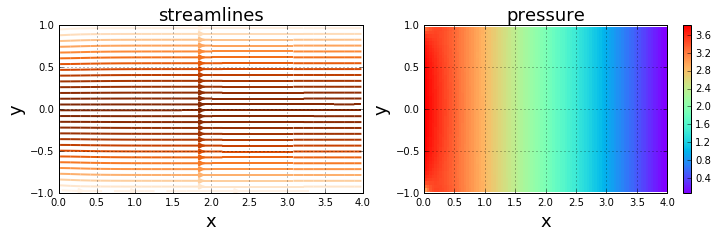

In [10]:
fig, axes = plt.subplots(ncols=2,figsize=(12,3))
p0=axes[0].streamplot(xp.T, yp.T, uvel.T, vvel.T, color=np.sqrt(uvel**2 + vvel**2).T, linewidth=2, cmap=plt.cm.Oranges)
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("y", fontsize=18)
axes[0].set_title("streamlines", fontsize=18)
axes[0].grid(True)
p1=axes[1].pcolor(xp, yp, p.pres,cmap=plt.cm.rainbow)
fig.colorbar(p1)
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("y", fontsize=18)
axes[1].set_title("pressure", fontsize=18)
axes[1].grid(True)

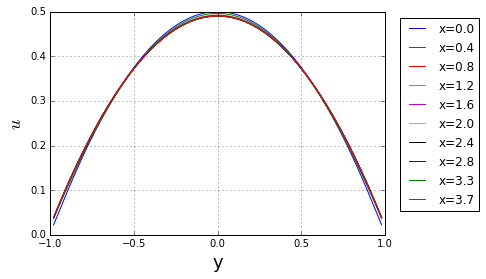

In [11]:
fig, axes = plt.subplots()
for i in range(0,m,10):
    loc = "x=%1.1f" % xp[i,0]
    axes.plot(yp[i,:],uvel[i,:],label=loc)
axes.legend(bbox_to_anchor=(1.3, 1),loc=1)
axes.set_xlabel("y", fontsize=18)
axes.set_ylabel(r"$u$", fontsize=18)
axes.grid(True)

### Case : $\phi_0=1$, $\phi_1=0.8$
$\alpha_0^2=0$, $\alpha_1^2=0.025$

In [12]:
# Define domain and grid
gr = grid(100,50,0,-1,4,1) 
m, n = gr.getSize()
# Assign porousity 
pm = PorousMedia(1.0,0.8)
print pm.alphaSq1
# Create objects
u = Xvelocity(gr,pm)
v = Yvelocity(gr,pm)
p = Pressure(gr,pm)
c = Continuity(gr,u,v)
# Boundary Conditions
# wall velocity
v.vel[:,0] = 0.0
v.vel[:,n-1] = 0.0
# inlet
v.vel[0,:] = 0.0
for j in range(n-1):
    y = gr.getY(j+0.5)
    u.vel[0,j] = 0.5 * (1 - y * y)
# Solve
uvel, vvel, p, xp, yp = Solver(gr,pm,u,v,p,c)

0.025
successfully converge
U residual= 5.68827889005e-09
V residual= 4.26227072472e-09
C residual= 0.00125112788953


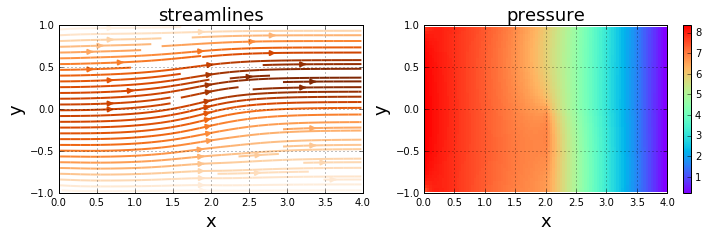

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=(12,3))
p0=axes[0].streamplot(xp.T, yp.T, uvel.T, vvel.T, color=np.sqrt(uvel**2 + vvel**2).T, linewidth=2, cmap=plt.cm.Oranges)
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("y", fontsize=18)
axes[0].set_title("streamlines", fontsize=18)
axes[0].grid(True)
p1=axes[1].pcolor(xp, yp, p.pres,cmap=plt.cm.rainbow)
fig.colorbar(p1)
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("y", fontsize=18)
axes[1].set_title("pressure", fontsize=18)
axes[1].grid(True)

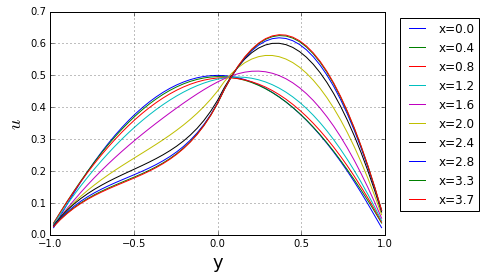

In [14]:
fig, axes = plt.subplots()
for i in range(0,m,10):
    loc = "x=%1.1f" % xp[i,0]
    axes.plot(yp[i,:],uvel[i,:],label=loc)
axes.legend(bbox_to_anchor=(1.3, 1),loc=1)
axes.set_xlabel("y", fontsize=18)
axes.set_ylabel(r"$u$", fontsize=18)
axes.grid(True)

### Case : $\phi_0=1$, $\phi_1=0.5$
$\alpha_0^2=0$, $\alpha_1^2=0.1$

In [ ]:
# Define domain and grid
gr = grid(100,50,0,-1,4,1) 
m, n = gr.getSize()
# Assign porousity 
pm = PorousMedia(1.0,0.5)
print pm.alphaSq1
# Create objects
u = Xvelocity(gr,pm)
v = Yvelocity(gr,pm)
p = Pressure(gr,pm)
c = Continuity(gr,u,v)
# Boundary Conditions
# wall velocity
v.vel[:,0] = 0.0
v.vel[:,n-1] = 0.0
# inlet
v.vel[0,:] = 0.0
for j in range(n-1):
    y = gr.getY(j+0.5)
    u.vel[0,j] = 0.5 * (1 - y * y)
# Solve
uvel, vvel, p, xp, yp = Solver(gr,pm,u,v,p,c)

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(12,3))
p0=axes[0].streamplot(xp.T, yp.T, uvel.T, vvel.T, color=np.sqrt(uvel**2 + vvel**2).T, linewidth=2, cmap=plt.cm.Oranges)
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("y", fontsize=18)
axes[0].set_title("streamlines", fontsize=18)
axes[0].grid(True)
p1=axes[1].pcolor(xp, yp, p.pres,cmap=plt.cm.rainbow)
fig.colorbar(p1)
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("y", fontsize=18)
axes[1].set_title("pressure", fontsize=18)
axes[1].grid(True)

In [ ]:
fig, axes = plt.subplots()
for i in range(0,m,10):
    loc = "x=%1.1f" % xp[i,0]
    axes.plot(yp[i,:],uvel[i,:],label=loc)
axes.legend(bbox_to_anchor=(1.3, 1),loc=1)
axes.set_xlabel("y", fontsize=18)
axes.set_ylabel(r"$u$", fontsize=18)
axes.grid(True)

### Case : $\phi_0=1$, $\phi_1=0.3$
$\alpha_0^2=0$, $\alpha_1^2=0.23$

In [ ]:
# Define domain and grid
gr = grid(100,50,0,-1,4,1) 
m, n = gr.getSize()
# Assign porousity 
pm = PorousMedia(1.0,0.3)
print pm.alphaSq1
# Create objects
u = Xvelocity(gr,pm)
v = Yvelocity(gr,pm)
p = Pressure(gr,pm)
c = Continuity(gr,u,v)
# Boundary Conditions
# wall velocity
v.vel[:,0] = 0.0
v.vel[:,n-1] = 0.0
# inlet
v.vel[0,:] = 0.0
for j in range(n-1):
    y = gr.getY(j+0.5)
    u.vel[0,j] = 0.5 * (1 - y * y)
# Solve
uvel, vvel, p, xp, yp = Solver(gr,pm,u,v,p,c)

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(12,3))
p0=axes[0].streamplot(xp.T, yp.T, uvel.T, vvel.T, color=np.sqrt(uvel**2 + vvel**2).T, linewidth=2, cmap=plt.cm.Oranges)
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("y", fontsize=18)
axes[0].set_title("streamlines", fontsize=18)
axes[0].grid(True)
p1=axes[1].pcolor(xp, yp, p.pres,cmap=plt.cm.rainbow)
fig.colorbar(p1)
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("y", fontsize=18)
axes[1].set_title("pressure", fontsize=18)
axes[1].grid(True)

In [ ]:
fig, axes = plt.subplots()
for i in range(0,m,10):
    loc = "x=%1.1f" % xp[i,0]
    axes.plot(yp[i,:],uvel[i,:],label=loc)
axes.legend(bbox_to_anchor=(1.3, 1),loc=1)
axes.set_xlabel("y", fontsize=18)
axes.set_ylabel(r"$u$", fontsize=18)
axes.grid(True)

### Case : $\phi_0=1$, $\phi_1=0.1$
$\alpha_0^2=0$, $\alpha_1^2=0.9$

In [ ]:
# Define domain and grid
gr = grid(100,50,0,-1,4,1) 
m, n = gr.getSize()
# Assign porousity 
pm = PorousMedia(1.0,0.1)
print pm.alphaSq1
# Create objects
u = Xvelocity(gr,pm)
v = Yvelocity(gr,pm)
p = Pressure(gr,pm)
c = Continuity(gr,u,v)
# Boundary Conditions
# wall velocity
v.vel[:,0] = 0.0
v.vel[:,n-1] = 0.0
# inlet
v.vel[0,:] = 0.0
for j in range(n-1):
    y = gr.getY(j+0.5)
    u.vel[0,j] = 0.5 * (1 - y * y)
# Solve
uvel, vvel, p, xp, yp = Solver(gr,pm,u,v,p,c)

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(12,3))
p0=axes[0].streamplot(xp.T, yp.T, uvel.T, vvel.T, color=np.sqrt(uvel**2 + vvel**2).T, linewidth=2, cmap=plt.cm.Oranges)
axes[0].set_xlabel("x", fontsize=18)
axes[0].set_ylabel("y", fontsize=18)
axes[0].set_title("streamlines", fontsize=18)
axes[0].grid(True)
p1=axes[1].pcolor(xp, yp, p.pres,cmap=plt.cm.rainbow)
fig.colorbar(p1)
axes[1].set_xlabel("x", fontsize=18)
axes[1].set_ylabel("y", fontsize=18)
axes[1].set_title("pressure", fontsize=18)
axes[1].grid(True)

In [ ]:
fig, axes = plt.subplots()
for i in range(0,m,10):
    loc = "x=%1.1f" % xp[i,0]
    axes.plot(yp[i,:],uvel[i,:],label=loc)
axes.legend(bbox_to_anchor=(1.3, 1),loc=1)
axes.set_xlabel("y", fontsize=18)
axes.set_ylabel(r"$u$", fontsize=18)
axes.grid(True)